<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/ISE_RMSE_stezenia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Importing the libraries

In [754]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [820]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidoryEJ3stezenia RMSE.csv to Dane pomidoryEJ3stezenia RMSE (1).csv


In [821]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Dane pomidoryEJ3stezenia RMSE (1).csv']),delimiter=';')

In [822]:
df

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Nazwa kodowana,DB5 steżenie,DB4 stężenie,V5 stezenie,V5_2 stezenie,V1_stezenie,M
0,Daktyle,1,1,1,1_1,"1,184885807","0,794320188","0,066498057","0,997372717","0,141401702","0,052790424"
1,Daktyle,1,1,2,1_2,"1,119573873","0,732030878","0,067305076","1,001246604","0,146634311","0,052790424"
2,Daktyle,1,1,3,1_3,"1,139704942","0,695982537","0,065775971","0,96490352","0,148520237","0,052790424"
3,barszcz diluted 45mlH2O5ml,2,2,1,2_1,"0,642674229","0,257943847","0,012340174","0,051663414","0,017808991","0,051153512"
4,barszcz diluted 45mlH2O5ml,2,2,2,2_2,"0,620729667","0,213062792","0,012602402","0,053821697","0,019180782","0,051153512"
5,barszcz diluted 45mlH2O5ml,2,2,3,2_3,"0,591606678","0,196714095","0,012680711","0,05346477","0,019445987","0,051153512"
6,Tarczyn pikantny,3,3,1,3_1,"0,677890571","0,376666036","0,041772415","0,475719704","0,093441408","0,06394189"
7,Tarczyn pikantny,3,3,2,3_2,"0,658935951","0,334328485","0,042841393","0,501396509","0,081587665","0,06394189"
8,Tarczyn pikantny,3,3,3,3_3,"0,62364594","0,306551734","0,042667209","0,526923682","0,083160038","0,06394189"
9,tymbark klasyczny E190127,4,3,1,4_1,"0,986081259","0,366147618","0,042992123","0,502699294","0,092927942","0,06394189"


### Split the dataset into the features, that will be used for the analysis X and the vector of values that we will want to predict y

In [826]:
#lets choose the all the columns except the concentration
Y_true = df.iloc[:,10].values

In [827]:
Y_true

array(['0,052790424', '0,052790424', '0,052790424', '0,051153512',
       '0,051153512', '0,051153512', '0,06394189', '0,06394189',
       '0,06394189', '0,06394189', '0,06394189', '0,06394189',
       '0,06394189', '0,06394189', '0,06394189', '0,06394189',
       '0,06394189', '0,06394189', '0,061384214', '0,061384214',
       '0,061384214', '0,076730268', '0,076730268', '0,076730268',
       '0,038365134', '0,038365134', '0,038365134', '0,000191826',
       '0,000191826', '0,000191826', '0,001158627', '0,001158627',
       '0,001158627', '0,000179037', '0,000179037', '0,000179037',
       '0,012788378', '0,012788378', '0,012788378', '0,025320988',
       '0,025320988', '0,025320988', '0,06394189', '0,06394189',
       '0,06394189', '0,06394189', '0,06394189', '0,06394189'],
      dtype=object)

In [828]:
# we will try to predict the concentration content so lets column concentration to y
yDB5 = df.iloc[:,5].values

In [829]:
# and check if its the concentration
print(yDB5)

['1,184885807' '1,119573873' '1,139704942' '0,642674229' '0,620729667'
 '0,591606678' '0,677890571' '0,658935951' '0,62364594' '0,986081259'
 '0,700607065' '0,652109982' '1,028893765' '0,676090659' '0,641520766'
 '0,661263376' '0,712764584' '0,628688028' '0,611335788' '0,668265136'
 '0,629721522' '0,864953328' '0,881087432' '0,827556525' '0,480243725'
 '0,510076266' '0,469841857' '0,039516493' '0,029855784' '0,026810081'
 '0,06533786' '0,05779037' '0,053594597' '0,011722829' '0,01413141'
 '0,01489613' '0,274684751' '0,241760189' '0,237288742' '0,491063626'
 '0,406771647' '0,378950078' '0,715066095' '0,693989366' '0,611838181'
 '0,639250441' '0,690767672' '0,649988468']


In [830]:
print('MAE:', metrics.mean_absolute_error(Y_true, yDB5))
print('MSE:', metrics.mean_squared_error(Y_true, yDB5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_true, yDB5)))
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

ValueError: ignored

# Multiple Linear Regression

In [792]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [793]:
predictions_lr = regressor.predict(X_test)

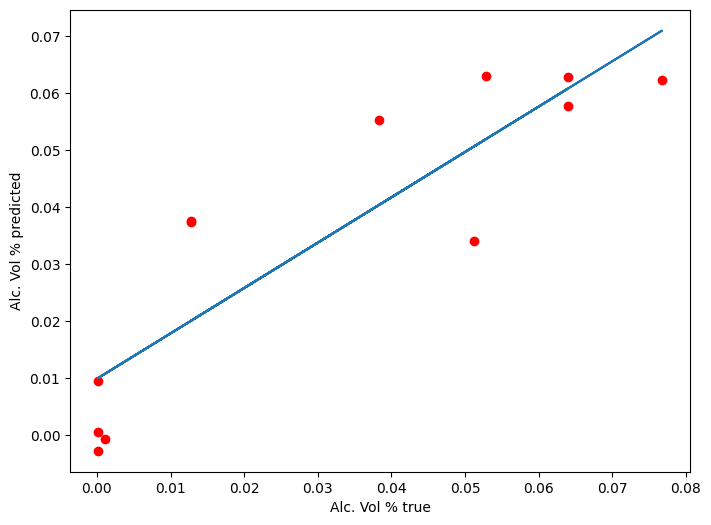

In [794]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [795]:
predcopyMLR = pd.DataFrame(predictions_lr)
predcopyMLR

,0
0,0.009487
1,0.062318
2,0.037365
3,0.037568
4,0.062941
5,0.034071
6,-0.000705
7,0.055337
8,0.057684
9,0.000526


In [796]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))

MAE: 0.010816445548396973
MSE: 0.00018732253838973996
RMSE: 0.013686582421837087


# Polynomial Regression

In [168]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [169]:
predictions_poly = lin_reg_2.predict(X_poly_test)

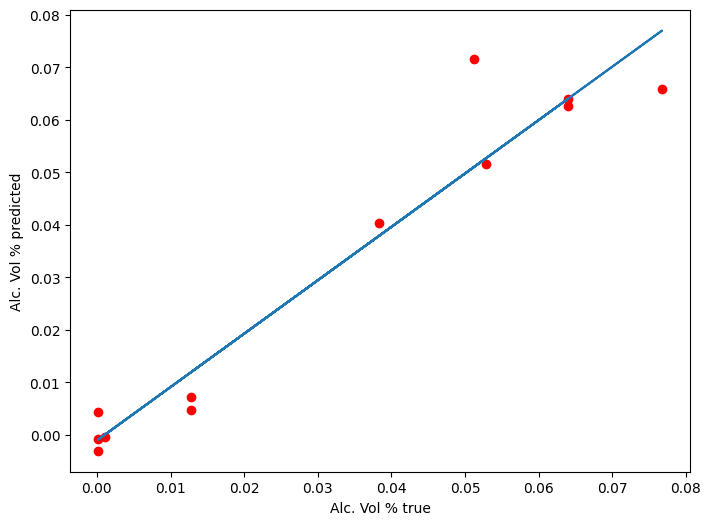

In [170]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_poly,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_poly, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [171]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_poly))
print('MSE:', metrics.mean_squared_error(y_test, predictions_poly))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_poly)))

MAE: 0.004958478745508257
MSE: 5.5857420377577445e-05
RMSE: 0.007473782200303769


# Principal Component Regression

In [797]:
# first perform PCA and choose the number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

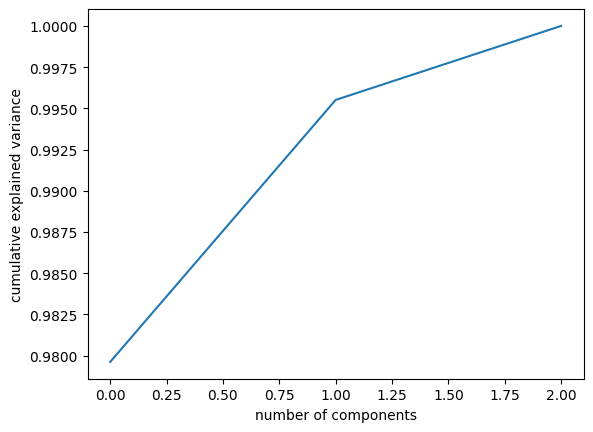

In [798]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [811]:
# perform PCA with the chosen number of components, fit it only on the training data
# and use this model to transform both train and test sets
pca = PCA(n_components=1)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [812]:
# perform linear regression with the results of the PCA
regressor2 = LinearRegression()
regressor2.fit(X_pca_train, y_train)

LinearRegression()

In [813]:
predictions_lr_pca = regressor2.predict(X_pca_test)

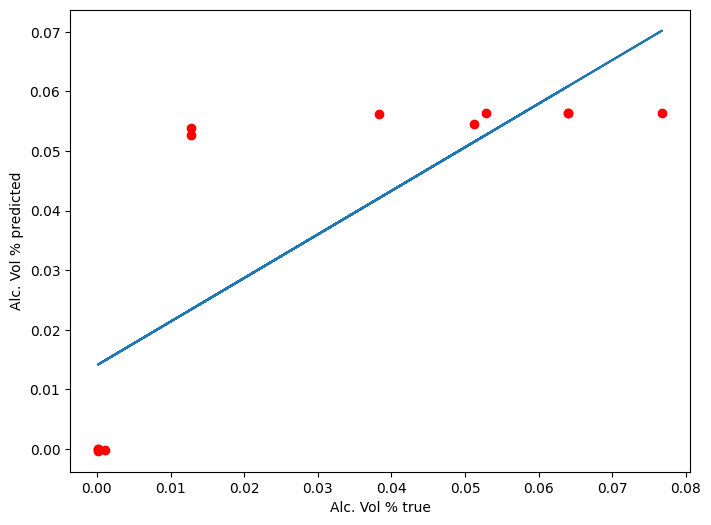

In [814]:
#create a scatter plot of true and predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr_pca,c='red')
plt.xlabel('Alc. Vol % true')
plt.ylabel('Alc. Vol % predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr_pca, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [815]:
predcopyPCR = pd.DataFrame(predictions_lr_pca)
predcopyPCR

,0
0,-0.000272
1,0.056366
2,0.053927
3,0.052707
4,0.056391
5,0.054499
6,-0.000123
7,0.056186
8,0.056312
9,-0.000044


In [816]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr_pca))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr_pca)))

MAE: 0.011952460727739913
MSE: 0.0003466201064923125
RMSE: 0.01861773634178743
